# Machine Learning and Data Analysis
----------------------------------------------
### *Session 4.3*


```
12th October, 2023
Anna Pallarès López
Computer Engineering Master's

```


In [2]:
import numpy as np
from google.colab import drive
from pandas import read_csv
import matplotlib.pyplot as plt

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
data_folder ='/content/drive/MyDrive/Colab Notebooks/Machine Learning & Data Analysis/Datasets/'

In [26]:
data = read_csv(data_folder + 'crime.csv', header = 0)

In [27]:
data.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [28]:
data = data.drop(columns = ['state','county','community','communityname','fold'], axis = 1)
data.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [29]:
data = data.replace('?',np.nan)

In [35]:
feat_miss = data.columns[data.isnull().any()]
print(feat_miss)
print(feat_miss.shape)

Index(['OtherPerCap', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
       'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop',
       'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol',
       'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian',
       'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
       'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
       'LemasGangUnitDeploy', 'PolicBudgPerPop'],
      dtype='object')
(23,)


In [36]:
data.shape

(1994, 123)

In [37]:
data[feat_miss].describe()

,OtherPerCap,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,...,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,PolicBudgPerPop
count,1993,319,319,319,319,319,319,319,319,319,...,319,319,319,319,319,319,319,319,319,319
unique,97,38,52,34,55,44,59,75,52,76,...,50,72,30,15,77,63,38,72,3,51
top,0,0.02,0.1,0.98,0.19,0.02,0.14,0.23,0.1,0.78,...,0,0.07,0.03,0.57,0.19,0.02,0.02,0.74,0,0.12
freq,129,80,19,81,17,55,23,15,19,12,...,189,14,48,54,12,27,69,13,126,22


In [40]:
 # first we get rid of the missing values

 from sklearn.impute import SimpleImputer
 imp = SimpleImputer(missing_values = np.nan,
                     strategy       = 'mean')
 data[['OtherPerCap']] = imp.fit_transform(data[['OtherPerCap']])

In [41]:
data = data.dropna(axis=1)
data.shape

(1994, 101)

In [42]:
data.columns # firsts columns the feature and the last is the target, what I want to predict

Index(['population', 'householdsize', 'racepctblack', 'racePctWhite',
       'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
       'agePct16t24', 'agePct65up',
       ...
       'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85', 'PctSameCity85',
       'PctSameState85', 'LandArea', 'PopDens', 'PctUsePubTrans',
       'LemasPctOfficDrugUn', 'ViolentCrimesPerPop'],
      dtype='object', length=101)

In [44]:
X = data.iloc[:,0:100].values # this are the features: from all the rows (:), I take the first 100 columns
y = data.iloc[:,100].values # the y is all the rows (:), only the last column (100) which is the target we want to predict


In [47]:
print(type(X))
print(X.shape)
print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
(1994, 100)
<class 'numpy.ndarray'>
(1994,)


In [50]:
# normalization, recommended to do from the values 0 to 1

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

(array([ 55.,  32.,  52.,  78.,  92., 144., 183., 199., 368., 791.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

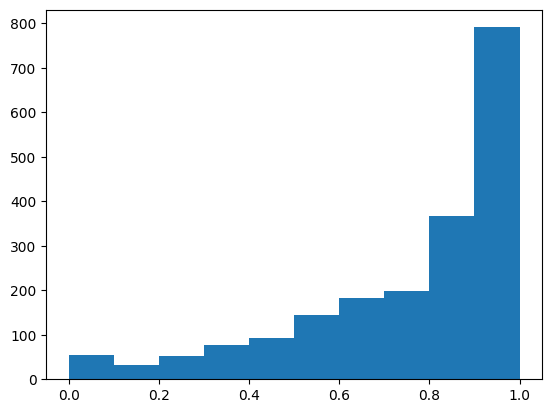

In [51]:
# outlayers (there are not here)

plt.hist(X[:,3])

In [52]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

ytt = np.asarray([])
ypp = np.asarray([])
for i in range(0,1):
  Xlv, Xt, ylv, yt = train_test_split(X, y, test_size = .1)

  grid = {'alpha'  : np.logspace(-4,3,10),
          'kernel' : ['rbf'],
          'gamma'  : np.logspace(-4,3,10)}
  MS = GridSearchCV(estimator   = KernelRidge(),
                    param_grid = grid,
                    scoring     = 'neg_mean_absolute_error',
                    cv          = 10,
                    verbose     = 2)
  H = MS.fit(Xlv,ylv)

  M = KernelRidge(alpha  = H.best_params_['alpha'],
                  kernel = H.best_params_['kernel'],
                  gamma  = H.best_params_['gamma'])
  M.fit(Xlv,ylv)

  yp = M.predict(Xt)

  ytt = np.concatenate((ytt,yt),axis=0)
  ypp = np.concatenate((ypp,yp),axis=0)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END .............alpha=0.0001, gamma=0.0001, kernel=rbf; total time=   0.2s
[CV] END .............alpha=0.0001, gamma=0.0001, kernel=rbf; total time=   0.2s
[CV] END .............alpha=0.0001, gamma=0.0001, kernel=rbf; total time=   0.2s
[CV] END .............alpha=0.0001, gamma=0.0001, kernel=rbf; total time=   0.2s
[CV] END .............alpha=0.0001, gamma=0.0001, kernel=rbf; total time=   0.5s
[CV] END .............alpha=0.0001, gamma=0.0001, kernel=rbf; total time=   0.7s
[CV] END .............alpha=0.0001, gamma=0.0001, kernel=rbf; total time=   0.6s
[CV] END .............alpha=0.0001, gamma=0.0001, kernel=rbf; total time=   0.6s
[CV] END .............alpha=0.0001, gamma=0.0001, kernel=rbf; total time=   0.6s
[CV] END .............alpha=0.0001, gamma=0.0001, kernel=rbf; total time=   0.6s
[CV] END alpha=0.0001, gamma=0.0005994842503189409, kernel=rbf; total time=   0.3s
[CV] END alpha=0.0001, gamma=0.00059948425

In [53]:
np.mean(np.abs(ytt-ypp))

0.08172013003807901

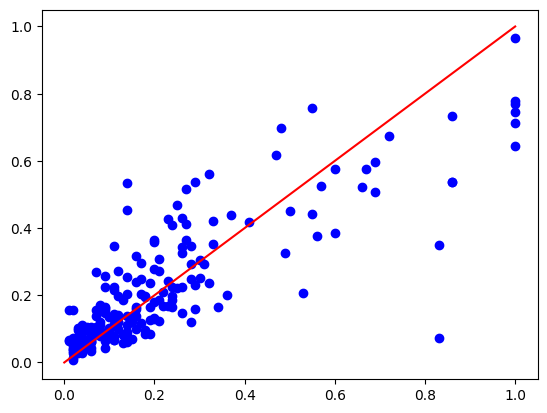

In [54]:
fig, ax = plt.subplots()
ax.plot(ytt,ypp,'bo')
ax.plot([0,1],[0,1],'r')